Problem Statement
"Segment customers based on demographic and loan-related attributes to identify distinct groups for targeted marketing and credit risk assessment."

 Target Variable
Since this is clustering (unsupervised learning), we don’t have a predefined target variable. Instead, the goal is to group similar customers together using clustering algorithms like K-Means.

In [3]:
import pandas as pd


In [5]:
# Load data
df = pd.read_csv(r"C:\Users\ANUSHA\Downloads\archive (8)\loan_data.csv")


In [7]:
# View top rows
print(df.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [9]:
# Dataset shape
print("Shape:", df.shape)


Shape: (45000, 14)


In [11]:
# Column names
print("Columns:", df.columns.tolist())


Columns: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']


In [13]:
# Summary statistics
print(df.describe(include='all'))


          person_age person_gender person_education  person_income  \
count   45000.000000         45000            45000   4.500000e+04   
unique           NaN             2                5            NaN   
top              NaN          male         Bachelor            NaN   
freq             NaN         24841            13399            NaN   
mean       27.764178           NaN              NaN   8.031905e+04   
std         6.045108           NaN              NaN   8.042250e+04   
min        20.000000           NaN              NaN   8.000000e+03   
25%        24.000000           NaN              NaN   4.720400e+04   
50%        26.000000           NaN              NaN   6.704800e+04   
75%        30.000000           NaN              NaN   9.578925e+04   
max       144.000000           NaN              NaN   7.200766e+06   

        person_emp_exp person_home_ownership     loan_amnt loan_intent  \
count     45000.000000                 45000  45000.000000       45000   
unique     

In [15]:
# Missing values
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [17]:
# Data types
print(df.dtypes)

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [19]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


data vilualisation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Set plot style
sns.set(style="whitegrid")

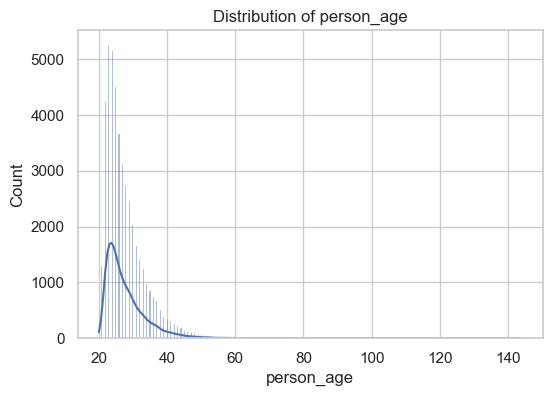

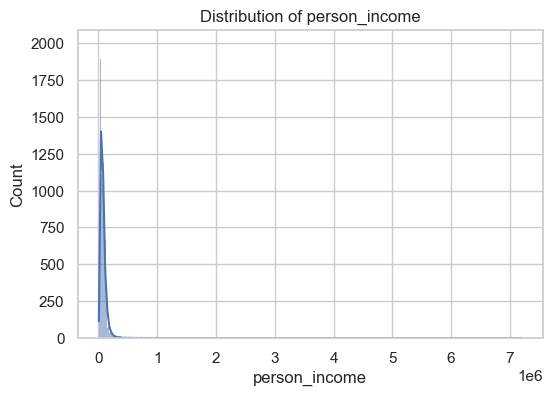

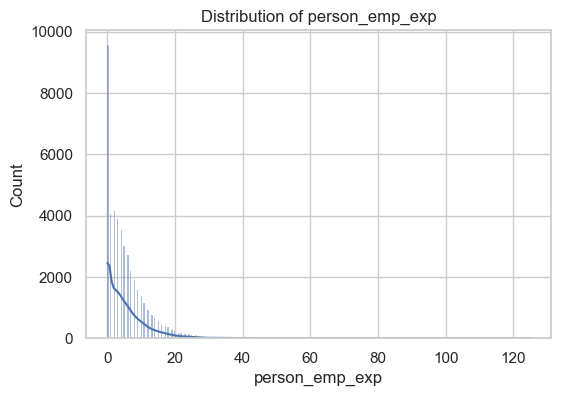

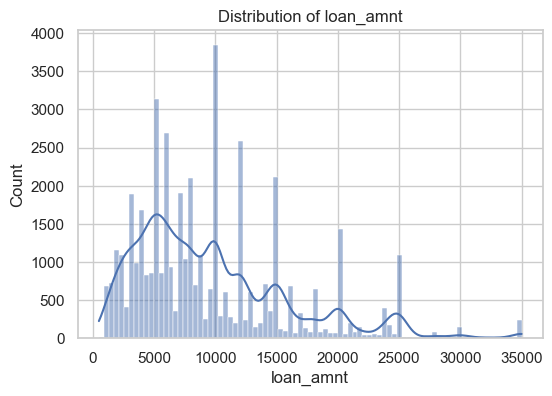

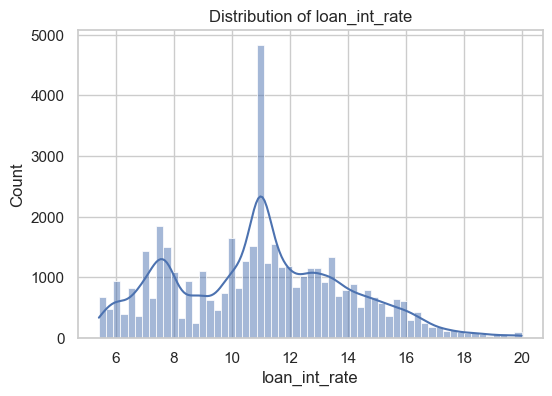

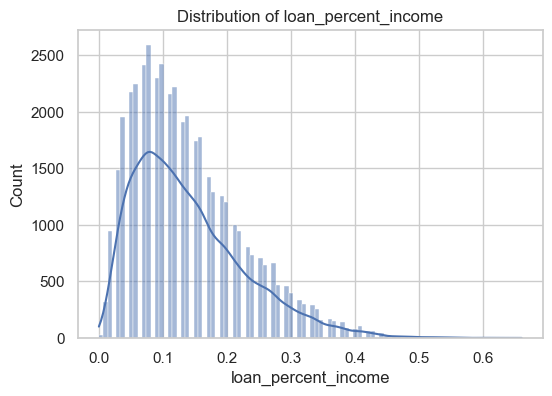

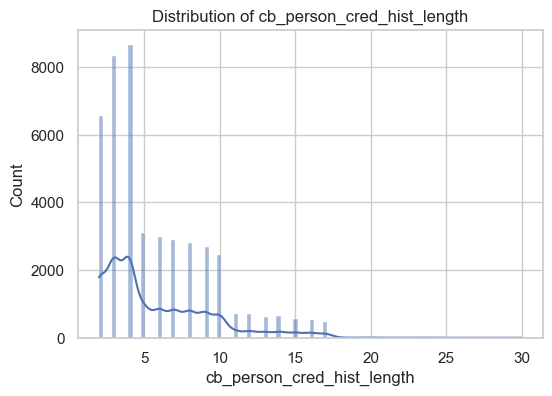

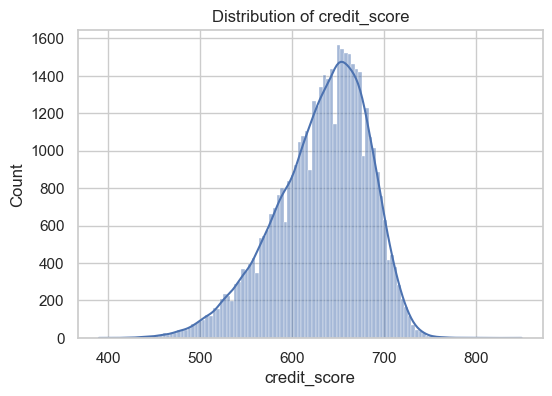

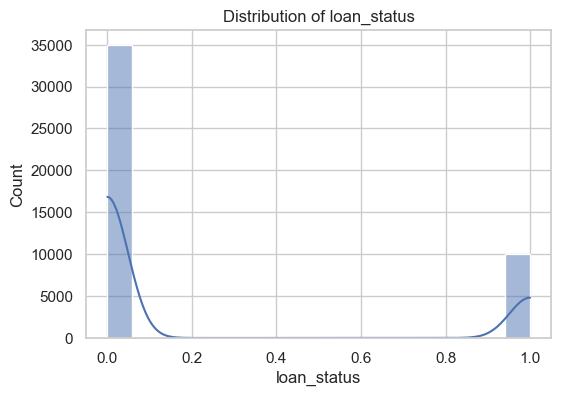

In [27]:
# Plot distribution of numerical features
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [31]:
# Heatmap for correlation (only numerical columns)
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

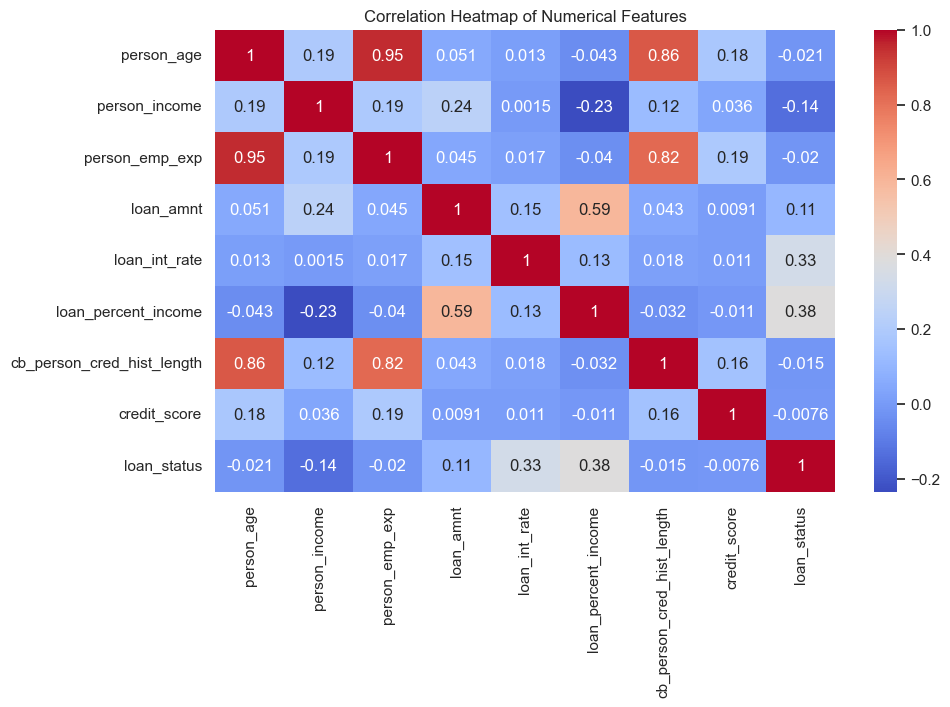

In [35]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

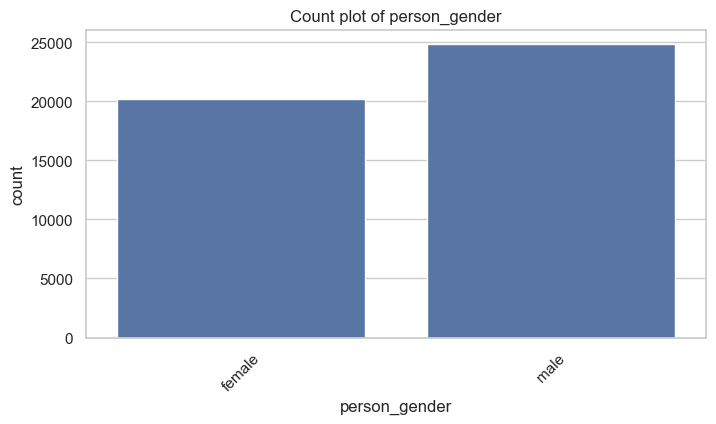

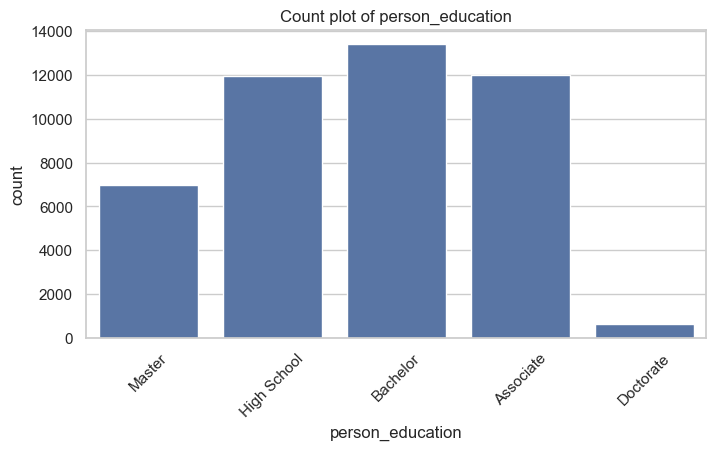

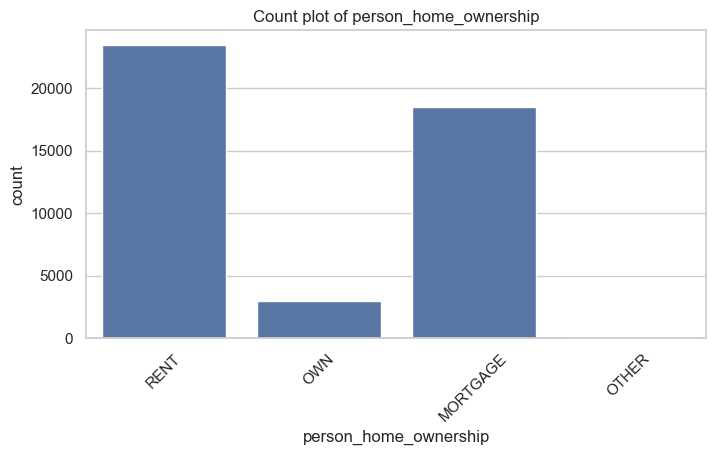

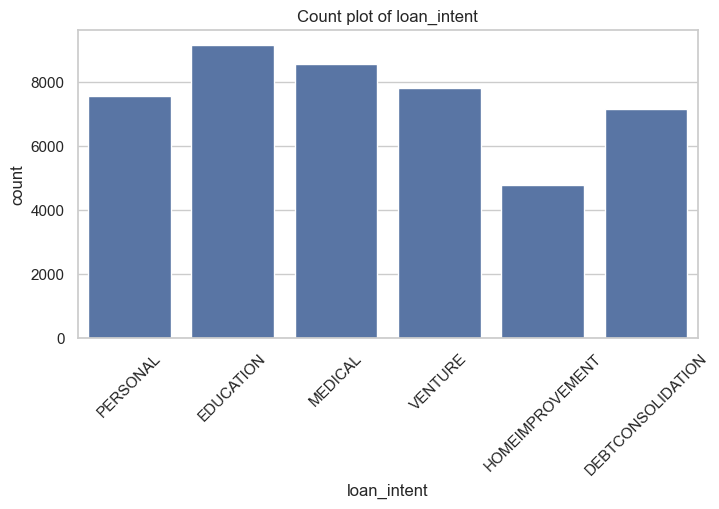

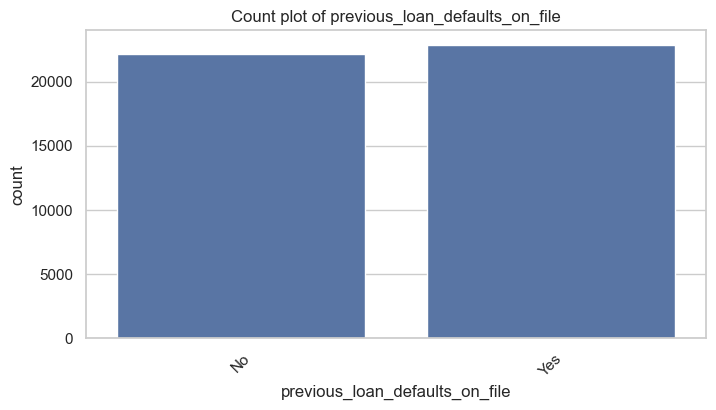

In [37]:
# Count plot for categorical variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

data processing

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [47]:
df[col] = df[col].fillna(df[col].mean())

In [49]:
df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Filling Missing Values

In [51]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [53]:
# Encode categorical features
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [57]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

In [59]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [63]:
# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

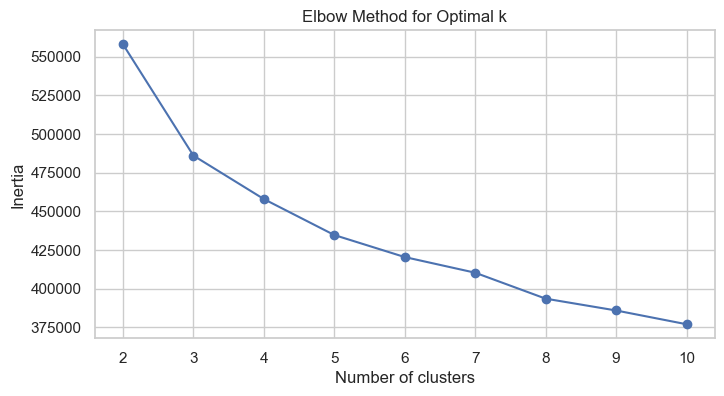

In [65]:
# Plot Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Apply K-Means and Visualize Clusters

In [67]:
# Apply KMeans with optimal k (suppose it's 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)


In [71]:
# Add cluster labels
df['Cluster'] = clusters

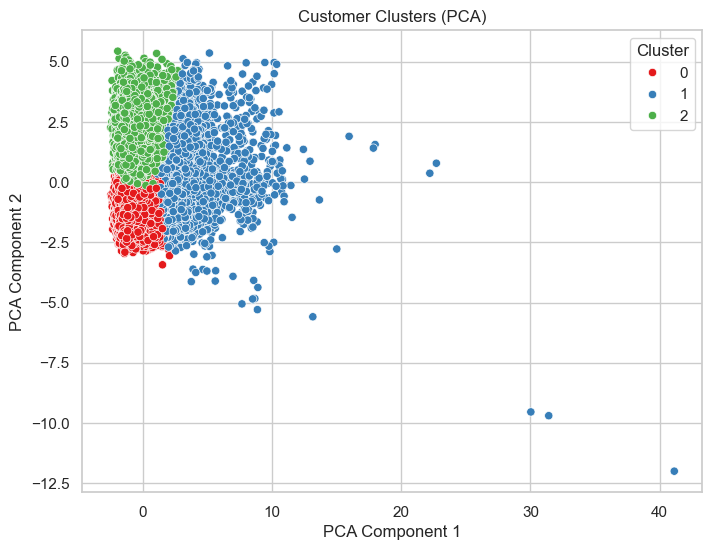

In [73]:
# Visualize clusters (using PCA for 2D plot)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='Set1')
plt.title("Customer Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
#Cluster Summary

In [75]:
# Group by cluster and analyze mean values
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         person_age  person_income  person_emp_exp     loan_amnt  \
Cluster                                                            
0         25.880814   82067.761661        3.515725   8989.808920   
1         38.997621  105357.562163       16.644624  10215.107358   
2         26.098769   57931.072338        3.779668  11020.194864   

         loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
Cluster                                                                   
0            10.403280             0.120599                    4.691131   
1            11.051395             0.128026                   12.857437   
2            12.871192             0.207688                    4.845158   

         credit_score  loan_status  
Cluster                             
0          628.928243     0.000375  
1          652.796384     0.148906  
2          630.545211     0.968432  


Summary
You performed data cleaning and visualizations.

Encoded and scaled the data.

Identified the optimal number of clusters using the Elbow Method.

Applied K-Means and interpreted clusters using PCA.

Analyzed cluster-level differences.



In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

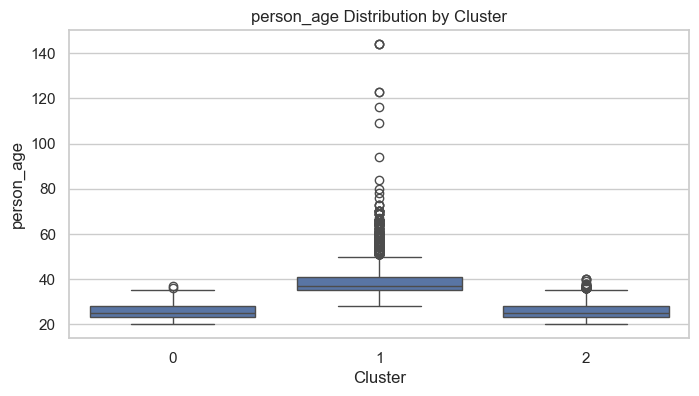

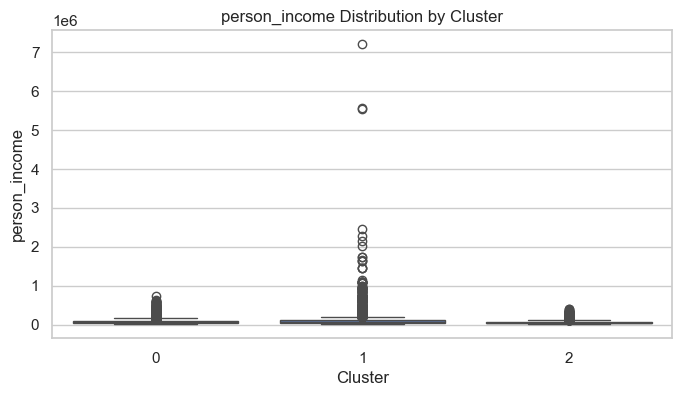

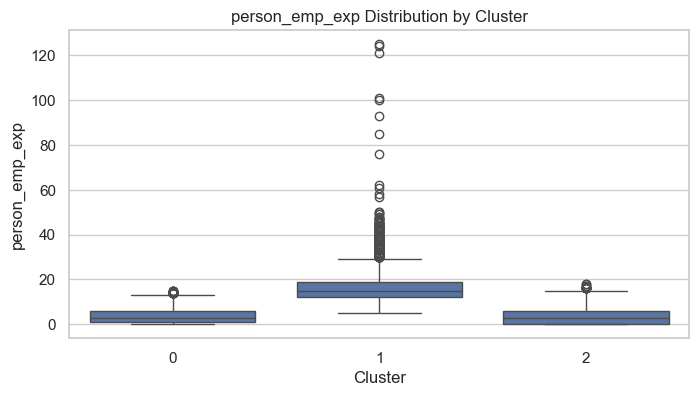

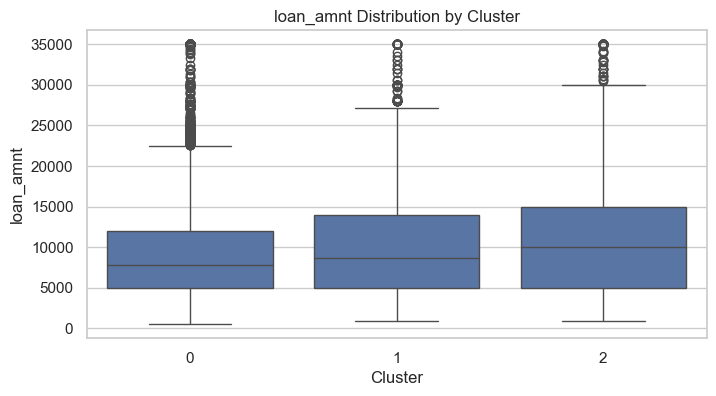

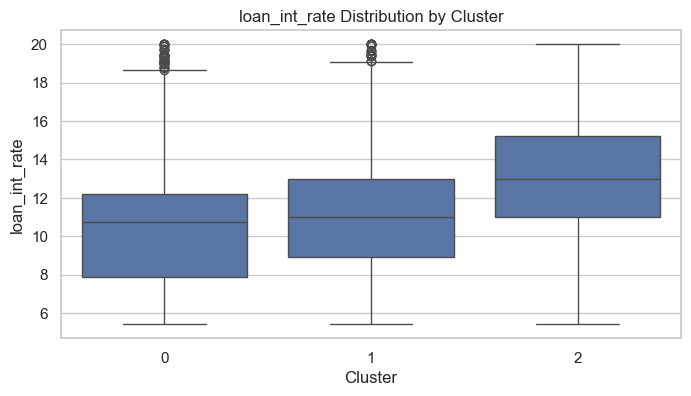

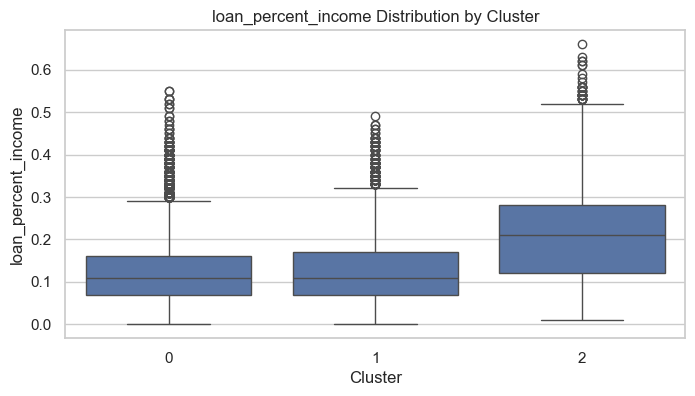

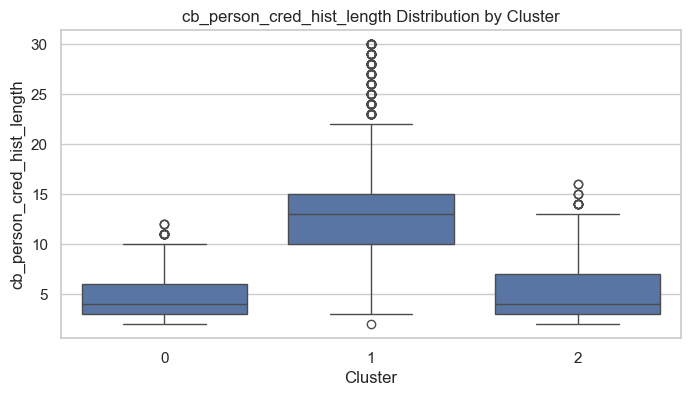

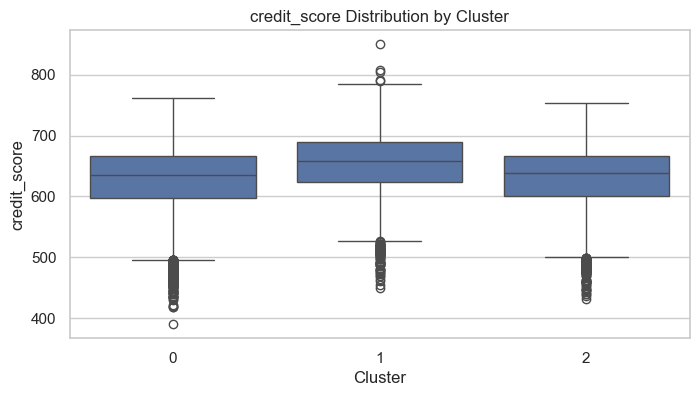

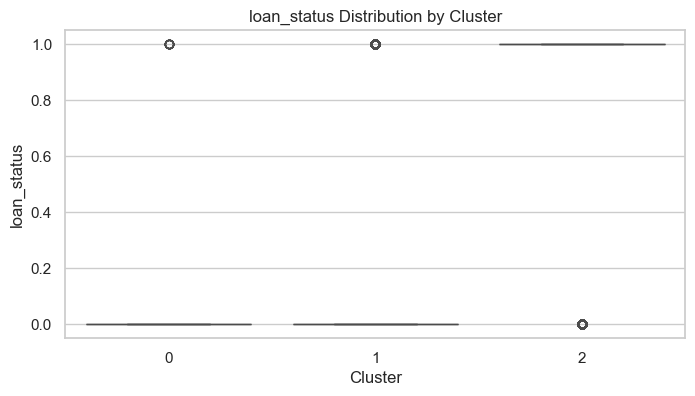

In [79]:
# Add cluster labels to your original dataframe (if not already done)
# df['Cluster'] = kmeans.labels_  # already done in Step 5

# Boxplots for numerical features across clusters
numerical_cols = df.select_dtypes(include='number').columns.drop('Cluster')

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f"{col} Distribution by Cluster")
    plt.show()

Profile Each Cluster

In [81]:
# Aggregated view by cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Profile:\n", cluster_profile)


Cluster Profile:
          person_age  person_income  person_emp_exp     loan_amnt  \
Cluster                                                            
0         25.880814   82067.761661        3.515725   8989.808920   
1         38.997621  105357.562163       16.644624  10215.107358   
2         26.098769   57931.072338        3.779668  11020.194864   

         loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
Cluster                                                                   
0            10.403280             0.120599                    4.691131   
1            11.051395             0.128026                   12.857437   
2            12.871192             0.207688                    4.845158   

         credit_score  loan_status  
Cluster                             
0          628.928243     0.000375  
1          652.796384     0.148906  
2          630.545211     0.968432  


In [83]:
# Count of samples in each cluster
print("\nCluster Counts:\n", df['Cluster'].value_counts())


Cluster Counts:
 Cluster
0    29349
2     9345
1     6306
Name: count, dtype: int64


In [85]:
# Mode of categorical features per cluster
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nMost common {col} in each cluster:")
    print(df.groupby('Cluster')[col].agg(lambda x: x.mode()[0]))


Most common person_gender in each cluster:
Cluster
0    male
1    male
2    male
Name: person_gender, dtype: object

Most common person_education in each cluster:
Cluster
0     Bachelor
1    Associate
2     Bachelor
Name: person_education, dtype: object

Most common person_home_ownership in each cluster:
Cluster
0    MORTGAGE
1    MORTGAGE
2        RENT
Name: person_home_ownership, dtype: object

Most common loan_intent in each cluster:
Cluster
0    EDUCATION
1      MEDICAL
2      MEDICAL
Name: loan_intent, dtype: object

Most common previous_loan_defaults_on_file in each cluster:
Cluster
0    Yes
1     No
2     No
Name: previous_loan_defaults_on_file, dtype: object


In [ ]:
#Visualize Cluster Composition by Categorical Variables

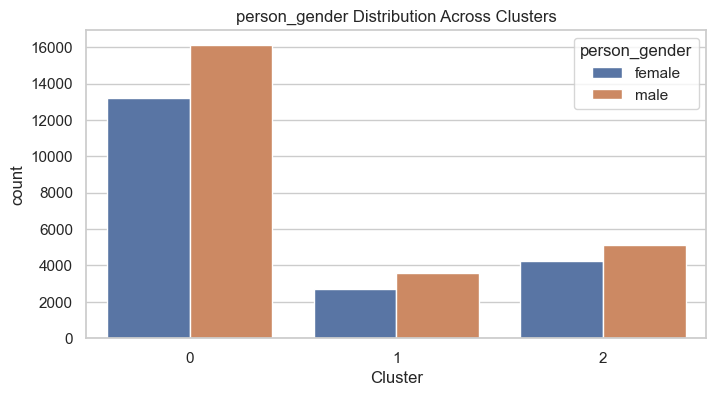

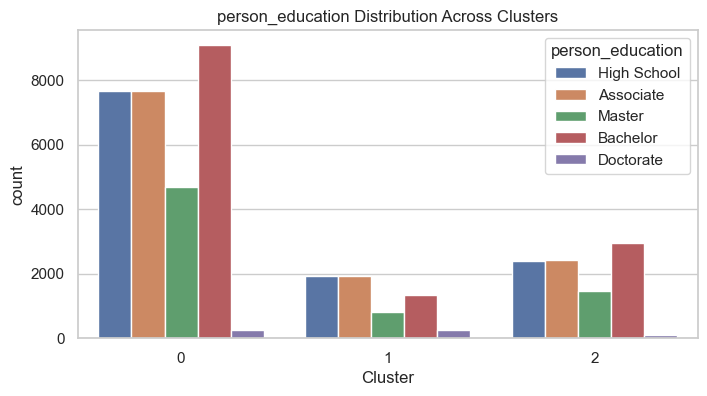

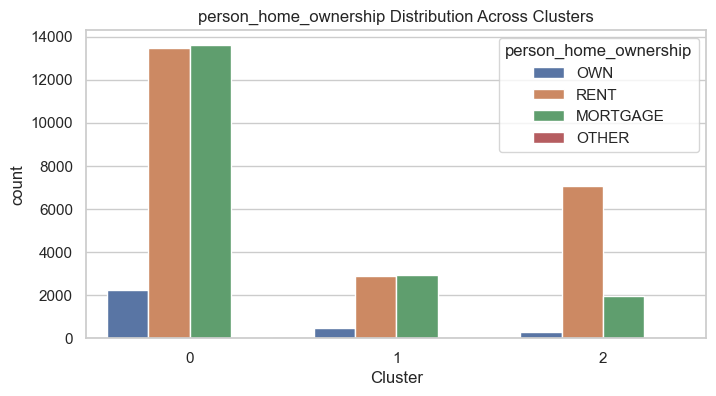

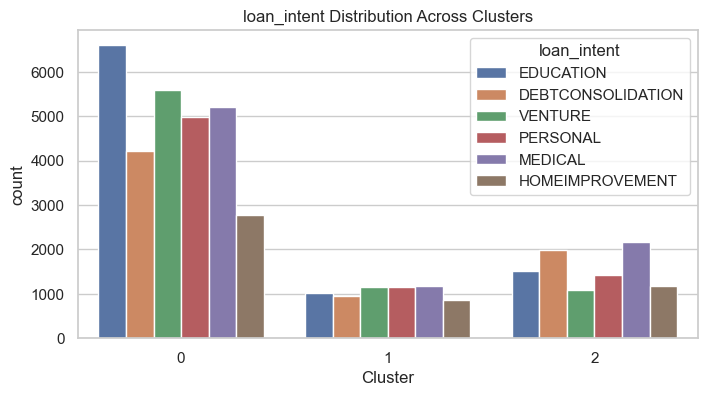

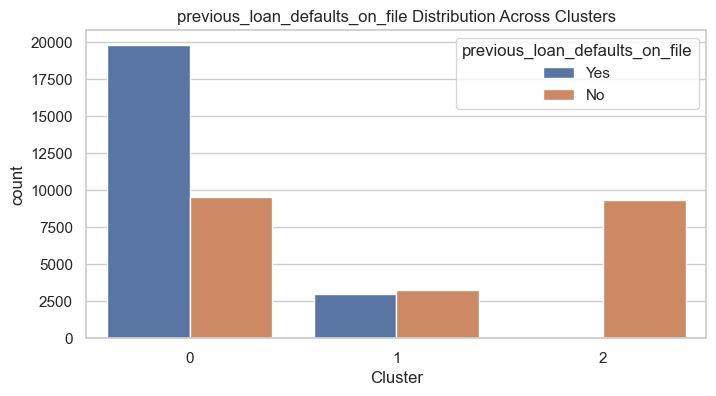

In [87]:
# Example with gender
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='Cluster', hue=col, data=df)
    plt.title(f"{col} Distribution Across Clusters")
    plt.show()

Interpret the Clusters
Use your cluster profiles and visualizations to describe each segment. For example:

Cluster 0: Young, low-income, high-loan applicants.

Cluster 1: Married professionals with stable financial profiles.

Cluster 2: Students or unemployed with high default risk.

Summary
You now have:

Cleaned and visualized the dataset.

Found optimal clusters using Elbow method.

Applied KMeans and labeled clusters.

Analyzed and visualized cluster characteristics.

Profiled customer segments for business decision-making.

Let me know if you want to:

Try Hierarchical Clustering or DBSCAN

Perform PCA feature reduction before clustering

Deploy it into a dashboard (e.g., Streamlit)i